#Regression & Its Evaluation-Assignment

Question 1: What is Simple Linear Regression?

Answer:
Simple Linear Regression is a statistical method used to model the relationship between two variables:

Independent variable (X) → predictor/input

Dependent variable (Y) → response/output

It fits a straight line (regression line).



Question 2: What are the key assumptions of Simple Linear Regression?

Answer:

Linearity – The relationship between X and Y is linear.

Independence – Observations are independent of each other.

Homoscedasticity – Constant variance of residuals (errors).

Normality – Residuals are normally distributed.

No Autocorrelation – Errors are not correlated with each other.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answer:

Heteroscedasticity occurs when the variance of residuals is not constant across levels of the independent variable(s).

Example: In predicting house prices, errors may increase for larger houses.

Why important:

Leads to inefficient estimates.

Standard errors become biased, making hypothesis tests and confidence intervals unreliable.

Solutions include log-transforming variables, using weighted least squares, or applying robust standard errors.



Question 4: What is Multiple Linear Regression?

Answer:
Multiple Linear Regression extends simple regression to include two or more independent variables.


It allows for more accurate predictions and helps understand the combined effect of multiple predictors on the dependent variable.

Question 5: What is polynomial regression, and how does it differ from linear regression?

Answer:

Polynomial Regression models a nonlinear relationship between X and Y by including higher-order terms of X
Difference:

Linear regression fits a straight line.

Polynomial regression fits a curved line to capture nonlinear patterns.

Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

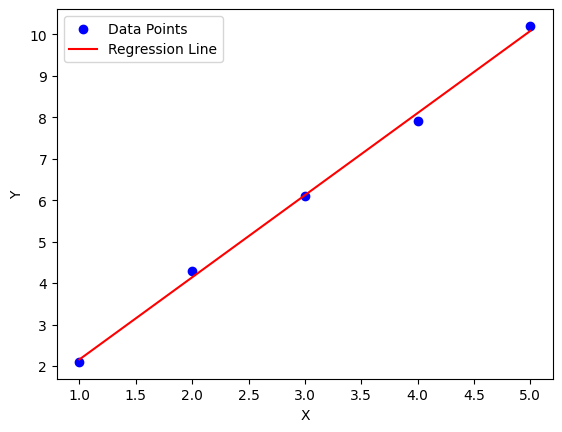

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Question 7:Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
y = data["Price"]

# Add constant
X_const = sm.add_constant(X)

# Model
model = sm.OLS(y, X_const).fit()
print(model.summary())

# VIF check
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 10 Sep 2025   Prob (F-statistic):             0.0377
Time:                        05:25:47   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]


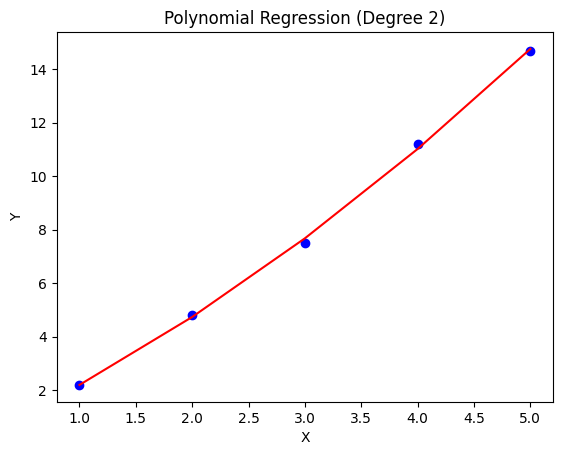

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color="blue")
plt.plot(X, Y_pred, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]

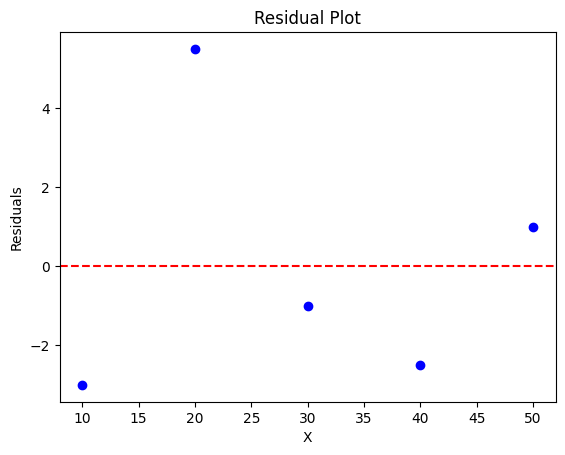

In [4]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


Answer:

Heteroscedasticity remedies:

Apply log or square root transformation of dependent variable.

Use Weighted Least Squares.

Use robust standard errors.

Multicollinearity remedies:

Calculate VIF to identify correlated predictors.

Drop highly correlated variables.

Use Principal Component Regression (PCR) or Ridge/Lasso regression.

Standardize variables to reduce scaling issues.

Ensure robust model:

Validate using train-test split or cross-validation.

Regularly check residuals plots and diagnostic tests.